In [1]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))


import logging.config
from app.config import settings

logging.config.dictConfig(settings.LOGGING)

In [2]:
from dobermann import Strategy, Candle, PositionType, indicators


class BollingerTestStrategy(Strategy):

    def __init__(self):
        super().__init__()

        self.ind_bollinger = indicators.BollingerBands()

    def on_candle(self, candle: Candle, _):
        # Вычисляем текущее значение индикатора
        lower_band, sma, upper_band = self.ind_bollinger.calculate(candle)
        if sma is None:
            # Индикатор еще не прогрет, ждем следующей свечи
            return

        price = candle.close

        if not self.active_position and price < lower_band:
            self.open_market_position(PositionType.LONG)

        elif self.active_position and price > upper_band:
            self.close_market_position()


In [3]:
from dobermann import backtest, Timeframe
import datetime as dt

ticker = 'BTCUSDT'
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021, 12, 31)
timeframes = [Timeframe.H1]

test_report = await BollingerTestStrategy().backtest(ticker, timeframes, start, end)

INFO    2022-01-20 08:17:21,529 dobermann.base: Fetching candles data for 1h... 
8737it [00:16, 540.38it/s]
INFO    2022-01-20 08:17:37,718 dobermann.base: Perform strategy... 
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8737/8737 [00:34<00:00, 252.45it/s]
INFO    2022-01-20 08:18:12,329 dobermann.base: Done! 


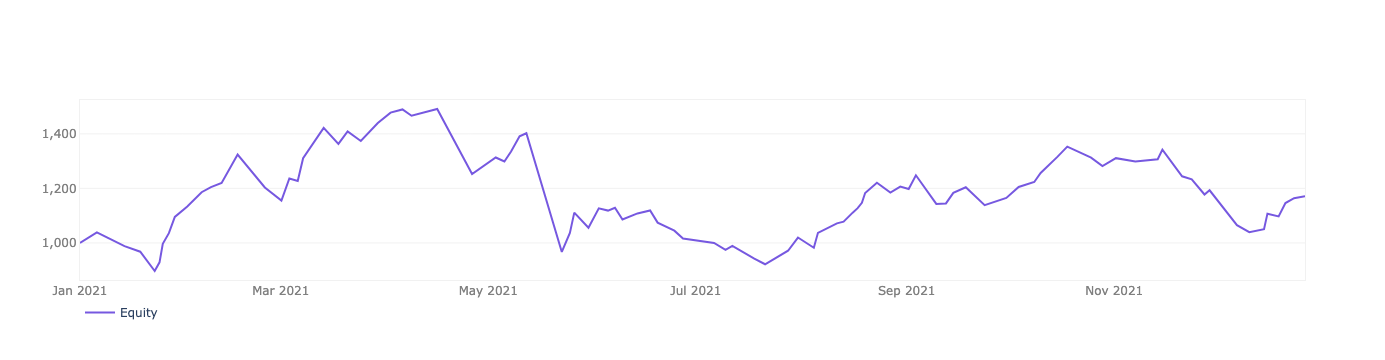

In [5]:
test_report.equity_graph.show()

In [6]:
test_report.summary

{'mean_profit_ratio': Decimal('1.00314214'),
 'gmean_profit_ratio': Decimal('1.00160152'),
 'max_dropdown': Decimal('0.68959540'),
 'total_trades': 99,
 'success_trades': 62,
 'fail_trades': 37,
 'success_trades_ratio': Decimal('0.62626262')}